# TASK 01(Iris Flower Classification)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["THREADPOOLCTL"] = "0"
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# importing dataset.
url = "https://raw.githubusercontent.com/MAliHasnain/OIBSIP/main/OIBSIP-Task%201/Iris.csv"
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking shape of the dataset
df.shape

(150, 6)

In [4]:
# checking Unique Values
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Extracting columns into the features
X=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

#converting it to numpy array.
X=X.values

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
from sklearn.cluster import KMeans

#initializing KMeans model
model=KMeans(n_clusters=3, n_init = 5)

# fitting the  KMeans models with the feature
model.fit(X)

# predicting cluster
pred=model.predict(X)

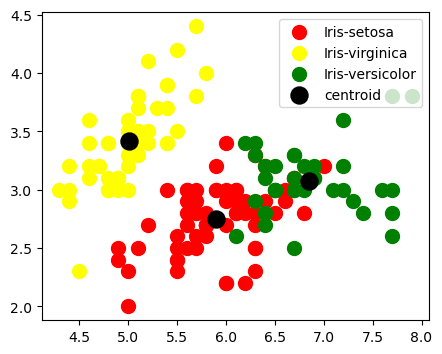

In [8]:
# creating a scatter plot with three different colored clusters representing different species of flowers
#  also marking the cluster centroids.

plt.figure(figsize=(5, 4))
plt.scatter(X[pred==0,0],X[pred==0,1],c='red',label='Iris-setosa',s=100)
plt.scatter(X[pred==1,0],X[pred==1,1],c='yellow',label='Iris-virginica',s=100)
plt.scatter(X[pred==2,0],X[pred==2,1],c='green',label='Iris-versicolor',s=100)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='black',s=150,label='centroid')
plt.legend()
plt.show()

In [9]:
# Creating an instance of the StandardScaler 
# StandardScaler standardizes features by removing the mean and scaling to unit variance

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
kmeans = KMeans(n_clusters=3, n_init = 5)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, n_init=5))])

In [10]:
pp=pipeline.predict(X)

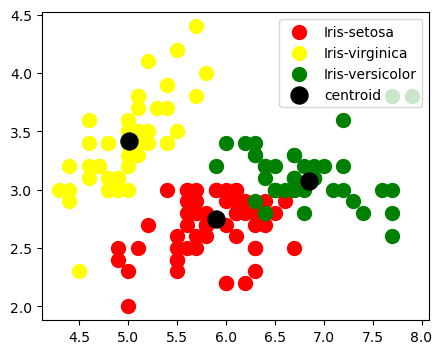

In [11]:
#  Again creating a scatter plot with three different colored clusters representing different species of flowers
#  also marking the cluster centroids
# seems to get the better results

plt.figure(figsize=(5, 4))
plt.scatter(X[pp==0,0],X[pp==0,1],c='red',label='Iris-setosa',s=100)
plt.scatter(X[pp==1,0],X[pp==1,1],c='yellow',label='Iris-virginica',s=100)
plt.scatter(X[pp==2,0],X[pp==2,1],c='green',label='Iris-versicolor',s=100)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='black',s=150,label='centroid')
plt.legend()
plt.show()

## Result: 
### An initial model was formed to identify the ideal number of clusters, and subsequent enhancements were made by scaling the data, resulting in improved clustering performance.